In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset/weatherHistory.csv


In [18]:
df = pd.read_csv('/kaggle/input/weather-dataset/weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [10]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [19]:
df = df.drop(['Daily Summary','Wind Bearing (degrees)','Summary','Precip Type','Temperature (C)','Loud Cover','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)'], axis = 1)
df.head()

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83


In [20]:
df.isnull().sum()

Formatted Date              0
Apparent Temperature (C)    0
Humidity                    0
dtype: int64

In [21]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc=True)
df = df.set_index('Formatted Date')
data = df[['Apparent Temperature (C)','Humidity']].resample('MS').mean()
data

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-01 00:00:00+00:00,21.383094,0.674046
2016-09-01 00:00:00+00:00,18.355833,0.688833
2016-10-01 00:00:00+00:00,8.923947,0.799906


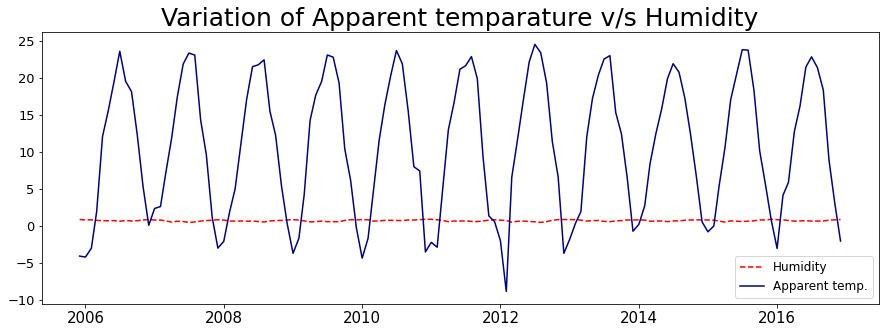

In [22]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,5));
plt.plot(data['Humidity'], label = 'Humidity', color = 'red',linestyle='dashed');
plt.plot(data['Apparent Temperature (C)'], label = 'Apparent temp.',color = 'navy');
plt.title('Variation of Apparent temparature v/s Humidity', fontsize= 25);
plt.legend(loc = 0, fontsize = 12);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 13);

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

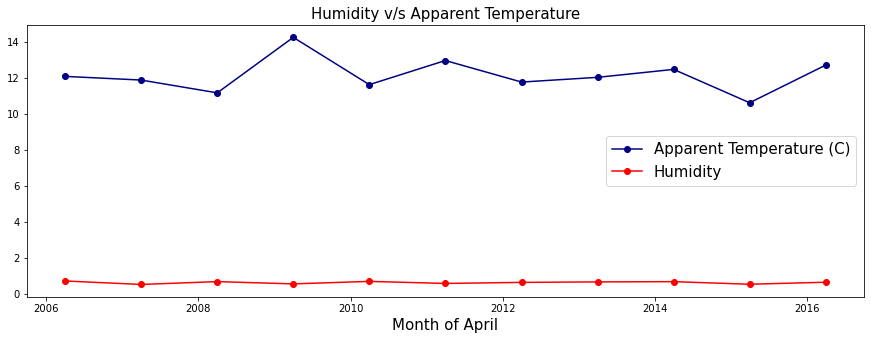

In [23]:
april = data[data.index.month==4]
plt.figure(figsize=(15,5))
plt.plot(april.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'navy');
plt.plot(april.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'red');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('Month of April', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

In [24]:
df = df.reset_index()
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc = True)
df['month'] = df['Formatted Date'].dt.month
df['year'] = df['Formatted Date'].dt.year

In [25]:
data3 = df.groupby(['month','year']).mean()
data3.head()

Apparent Temperature (C)  Humidity
month year                                    
1     2006                 -4.173708  0.834610
      2007                  2.387015  0.813495
      2008                 -2.069907  0.819476
      2009                 -3.669937  0.867621
      2010                 -4.329062  0.875914

(array([-15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.]),
 <a list of 10 Text major ticklabel objects>)

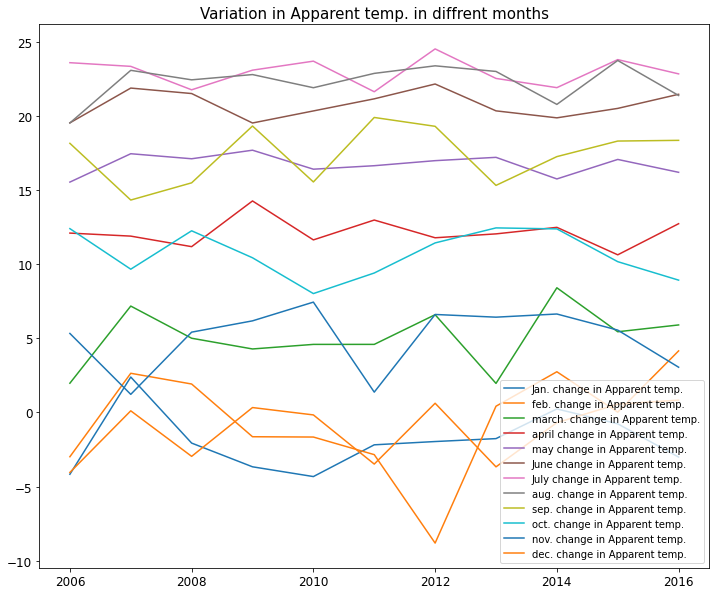

In [26]:
plt.figure(figsize=(12,10))
a = np.arange(2006,2017)
plt.plot(a,data3['Apparent Temperature (C)'][:11].values, label = 'Jan. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][11:22].values, label = 'feb. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][22:33].values, label = 'march. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][33:44].values, label = 'april change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][44:55].values, label = 'may change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][55:66].values, label = 'June change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][66:77].values, label = 'July change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][77:88].values, label = 'aug. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][88:99].values, label = 'sep. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][99:110].values, label = 'oct. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][110:121].values, label = 'nov. change in Apparent temp.')
plt.plot(a,data3['Apparent Temperature (C)'][121:132].values, label = 'dec. change in Apparent temp.')
#plt.xlabel(np.arange(2006,2017), fontsize = 15)
plt.legend(loc = 0)
plt.title('Variation in Apparent temp. in diffrent months',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)


(array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 7 Text major ticklabel objects>)

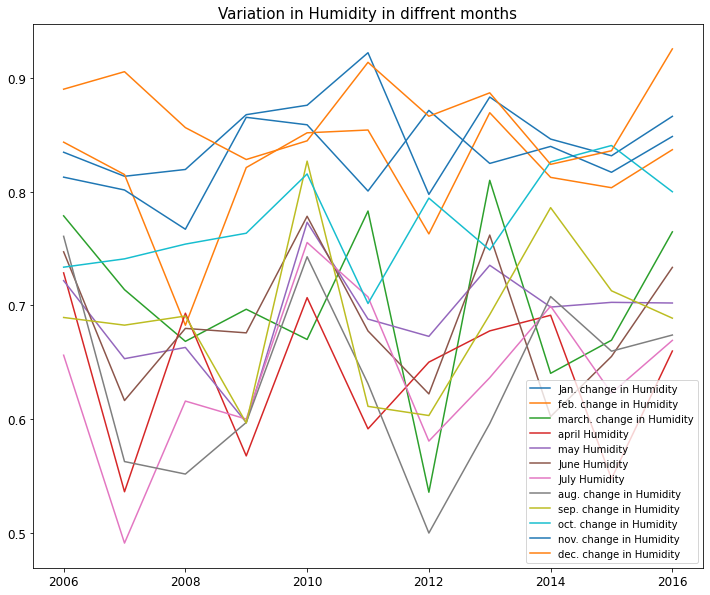

In [27]:
plt.figure(figsize=(12,10))
a = np.arange(2006,2017)
plt.plot(a,data3['Humidity'][:11].values, label = 'Jan. change in Humidity')
plt.plot(a,data3['Humidity'][11:22].values, label = 'feb. change in Humidity')
plt.plot(a,data3['Humidity'][22:33].values, label = 'march. change in Humidity')
plt.plot(a,data3['Humidity'][33:44].values, label = 'april Humidity')
plt.plot(a,data3['Humidity'][44:55].values, label = 'may Humidity')
plt.plot(a,data3['Humidity'][55:66].values, label = 'June Humidity')
plt.plot(a,data3['Humidity'][66:77].values, label = 'July Humidity')
plt.plot(a,data3['Humidity'][77:88].values, label = 'aug. change in Humidity')
plt.plot(a,data3['Humidity'][88:99].values, label = 'sep. change in Humidity')
plt.plot(a,data3['Humidity'][99:110].values, label = 'oct. change in Humidity')
plt.plot(a,data3['Humidity'][110:121].values, label = 'nov. change in Humidity')
plt.plot(a,data3['Humidity'][121:132].values, label = 'dec. change in Humidity')
plt.legend(loc = 0)
plt.title('Variation in Humidity in diffrent months',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

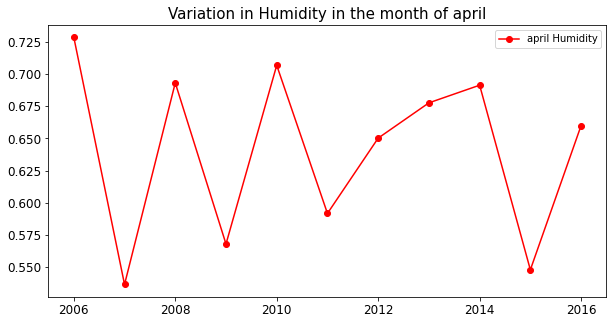

In [30]:
plt.figure(figsize = (10,5))
a = np.arange(2006,2017)
plt.plot(a,data3['Humidity'][33:44].values, label = 'april Humidity',marker = 'o',color = 'red')
plt.title('Variation in Humidity in the month of april',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc = 0)

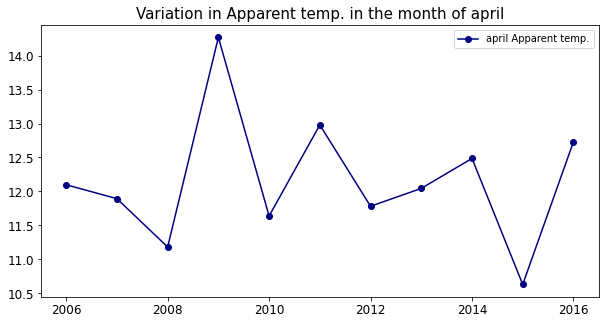

In [31]:
plt.figure(figsize = (10,5))
a = np.arange(2006,2017)
plt.plot(a,data3['Apparent Temperature (C)'][33:44].values, label = 'april Apparent temp.',color = 'navy', marker = 'o')
plt.title('Variation in Apparent temp. in the month of april',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc = 0)